In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

# para pintar
import pylab as plt
import seaborn as sns

In [2]:
data_ori = pd.read_csv('../data/attacks.csv', encoding='latin1')

data = data_ori.copy()

In [3]:
data.shape

(25723, 24)

In [4]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [5]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [6]:
def check_nan(df: pd.DataFrame) -> None:
    
    """Recibe un dataframe y enseña % de valores nulos y la grafica"""
    
    nan_cols = df.isna().mean()  * 100  # porcentaje de nulo en cada columna

    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    # grafico de nulos en el dataframe
    plt.figure(figsize=(10, 6))  # inicia la figura y establece el tamaño

    sns.heatmap(df.isna(),   # datos
                yticklabels=False,
                cmap='viridis',
                cbar=False
               )

    plt.show();

'N nan cols: 24'

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

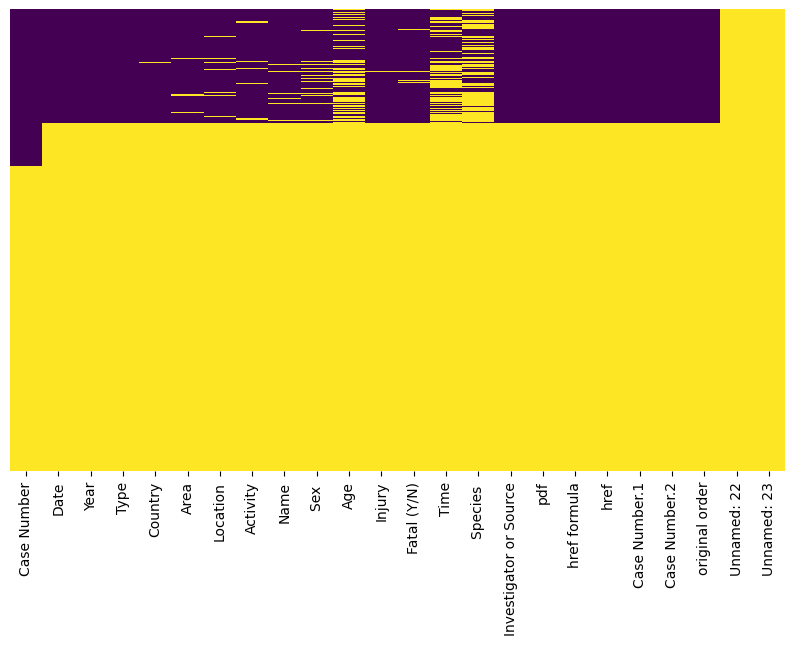

In [7]:
check_nan(data)

**EXPLORACIÓN FILAS**

In [8]:
# ¿Hay filas cuyos valores sean nulos en todas nuestras columnas?
# En el gráfico que se muestra arriba, podemos comprobar que así es
# La siguiente linea de código nos guarda una variable que contiene los índices de aquellas filas 
# cuyos valores son todos nulos

na_row_indices = data.loc[data.isna().all(axis=1)].index
na_row_indices

Int64Index([ 8702,  8703,  8704,  8705,  8706,  8707,  8708,  8709,  8710,
             8711,
            ...
            25712, 25713, 25714, 25715, 25716, 25717, 25718, 25719, 25720,
            25721],
           dtype='int64', length=17020)

In [9]:
# Procedemos a eliminar dichas filas con la siguiente linea de código

data = data.dropna(how='all')
data.shape

(8703, 24)

In [10]:
# Comprobamos la diferencia de filas entre nuestro df original y el modificado
data_ori.shape

(25723, 24)

'N nan cols: 24'

Case Number                0.011490
Date                      27.588188
Year                      27.611169
Type                      27.634149
Country                   28.162703
Area                      32.816270
Location                  33.792945
Activity                  33.838906
Name                      30.001149
Sex                       34.080202
Age                       60.117201
Injury                    27.909916
Fatal (Y/N)               33.781455
Time                      66.126623
Species                   60.197633
Investigator or Source    27.783523
pdf                       27.588188
href formula              27.599678
href                      27.588188
Case Number.1             27.588188
Case Number.2             27.588188
original order            27.507756
Unnamed: 22               99.988510
Unnamed: 23               99.977019
dtype: float64

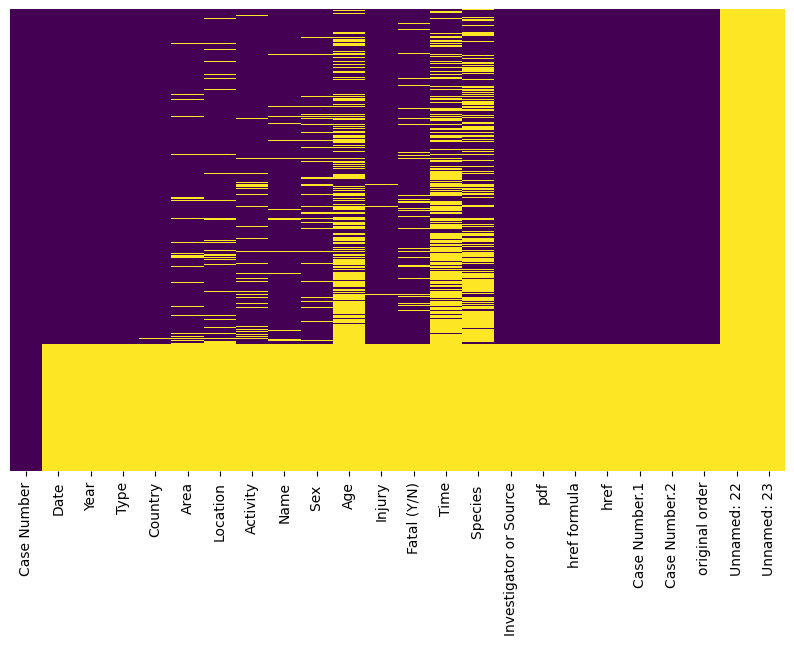

In [11]:
check_nan(data)

**ELIMINACION DE ESPACIOS EN NOMBRES DE COLUMNAS**

In [12]:
'''cols = data.columns
new_cols = []
for e in cols:
    e.replace(' ', '_')
    new_cols.append(e)
new_cols'''

"cols = data.columns\nnew_cols = []\nfor e in cols:\n    e.replace(' ', '_')\n    new_cols.append(e)\nnew_cols"

In [13]:
#data.info(memory_usage='deep')


In [14]:
# Nos fijamos una vez más en el gráfico de distribución de valores nulos
# Nos damos cuenta de que la columna Case Number ya no tiene
# Pero el final en los úlmos índices, el valor es 0, por lo que podemos considerarlo nulo también
# Apoyándonos en el hecho de que para los mismos índices, los valores del resto de columnas es NULO.



In [15]:
# Para eliminar las filas nulas restantes, obtendremos los índices de los registros nulos de la columna Date, por ejemplo.

bad_index_date = data.Date[data.Date.isna()].index

bad_index_date


Int64Index([ 6302,  6303,  6304,  6305,  6306,  6307,  6308,  6309,  6310,
             6311,
            ...
             8693,  8694,  8695,  8696,  8697,  8698,  8699,  8700,  8701,
            25722],
           dtype='int64', length=2401)

In [16]:
# Procedemos a eliminar las filas, usando la variable donde acumulamos los índices que nos interesaban


data.drop(bad_index_date, axis=0, inplace=True)





'N nan cols: 18'

Case Number                0.015868
Year                       0.031736
Type                       0.063472
Country                    0.793399
Area                       7.219930
Location                   8.568708
Activity                   8.632180
Name                       3.332275
Sex                        8.965408
Age                       44.922247
Injury                     0.444303
Fatal (Y/N)                8.552840
Time                      53.221200
Species                   45.033323
Investigator or Source     0.269756
href formula               0.015868
Unnamed: 22               99.984132
Unnamed: 23               99.968264
dtype: float64

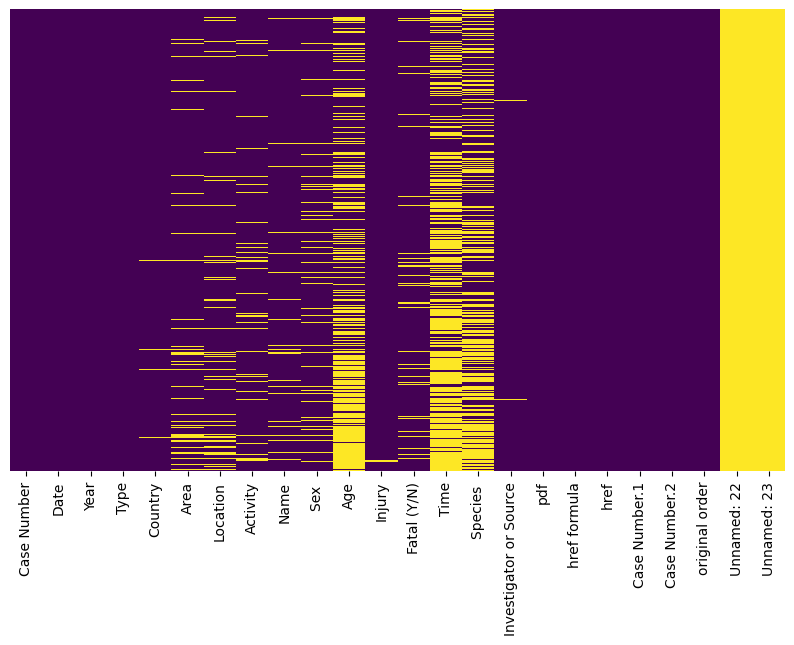

In [17]:
check_nan(data)

**ELIMINACIÓN DE FILAS DUPLICADAS**

In [18]:
# Compruebo si hay filas duplicadas
data.duplicated().any()

False

In [19]:
# Resultante de lo anterior, nos encontramos con que no hay filas duplicadas

**ELIMINACIÓN DE FILAS CON ALTO PORCENTAJE DE NULOS**

In [21]:
# Consideramos un umbral del 75% de valores nulos por fila
# Cualquier fila que supere este umbral, la eliminaremos.


In [22]:
# La siguiente función lambda nos creará una columna que contendrá el porcentaje de nulos de cada fila
data["porcentaje_nulos"] = data.apply(lambda x: x.isna().sum()/len(x), axis=1)

In [29]:
# Filtramos por aquellos que superan el 75%
data.porcentaje_nulos[data.porcentaje_nulos>0.75].index

Int64Index([], dtype='int64')

In [30]:
# No hay registros con estas caracteristicas
# El tamaño de nuestro df es el siguiente:
data.shape

(6302, 25)

**ELIMINACIÓN DE FILAS CON ALTO PORCENTAJE DE CEROS**

In [ ]:
# Aplicamos de manera similar la metodología anterior para determinar el porcentaje de 0 que hay

In [32]:
data["porcentaje_ceros"] = data.apply(lambda x: (x==0).sum()/len(x), axis=1)

In [37]:
data.porcentaje_ceros[data.porcentaje_ceros>0.75].index

Int64Index([], dtype='int64')

In [ ]:
# Llegamos a la misma conclusion que con los porcentajes de nulos

**EXPLORACION DE LA COLUMNA 'Age'**

In [38]:
# La columna Age contiene un gran porcentaje de valores nulos. Es decir, se desconoce la edad de las personas involucradas
# en ese caso.
# Determino que no es posible conocer ese dato y relleno los valores nulos con 'Unknown'

data.fillna({'Age':'Unknown'}, inplace = True)

'N nan cols: 17'

Case Number                0.015868
Year                       0.031736
Type                       0.063472
Country                    0.793399
Area                       7.219930
Location                   8.568708
Activity                   8.632180
Name                       3.332275
Sex                        8.965408
Injury                     0.444303
Fatal (Y/N)                8.552840
Time                      53.221200
Species                   45.033323
Investigator or Source     0.269756
href formula               0.015868
Unnamed: 22               99.984132
Unnamed: 23               99.968264
dtype: float64

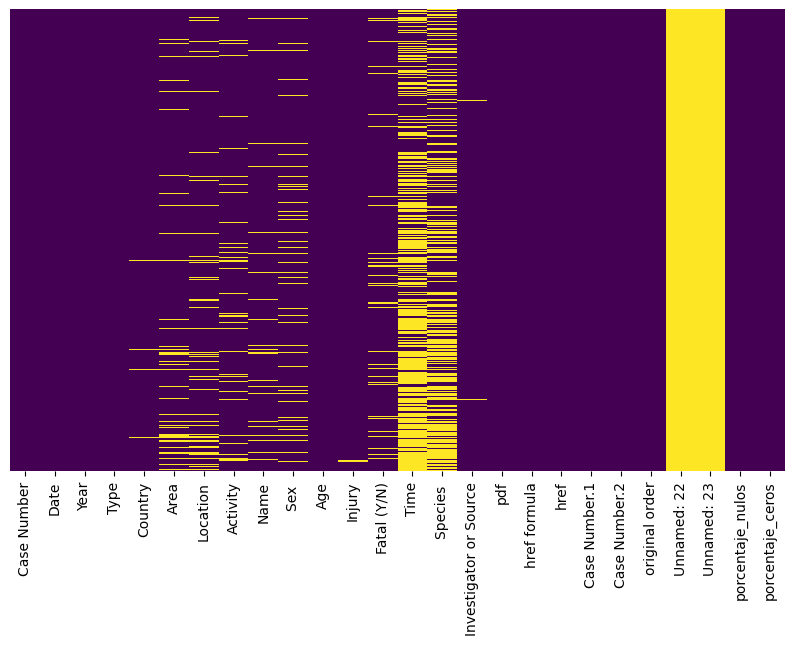

In [39]:
check_nan(data)

**EXPLORACION DE LA COLUMNA 'Injury' and 'Fatal'**

In [40]:
# Probablemente exista una relación entre el tipo de lesion y su mortalidad.


In [41]:
data.head(40)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,porcentaje_nulos,porcentaje_ceros
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,0.083333,0.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,0.125000,0.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,0.125000,0.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Unknown,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,0.166667,0.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,0.166667,0.0
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,Unknown,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN,0.208333,0.0
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN,0.083333,0.0
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN,0.125000,0.0
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN,0.083333,0.0
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN,0.125000,0.0


In [42]:
# Poseemos casi todos los datos referidos al tipo de lesión. Los que no, conocemos si murió o no.
# No obstante, eso no nos hace conocer la descripción de lo que pasó.
# Podemos considerar la opción de rellenar con 'Unknown' las columnas de 'Injury'

In [43]:
bad_index_injury = data.Injury[data.Injury.isna()].index
bad_index_injury

Int64Index([1270, 1366, 2250, 2267, 2648, 3038, 3207, 3298, 3434, 3457, 3491,
            3712, 3838, 3841, 4060, 4517, 4976, 5370, 5547, 5965, 6140, 6153,
            6165, 6166, 6167, 6171, 6172, 6277],
           dtype='int64')

In [44]:
data.loc[bad_index_injury, 'Injury':'Fatal (Y/N)'].head()

,Injury,Fatal (Y/N)
1270,NaN,UNKNOWN
1366,NaN,NaN
2250,NaN,UNKNOWN
2267,NaN,UNKNOWN
2648,NaN,UNKNOWN


In [45]:
# Determinamos que no son valores conocidos y procedo a rellenarlos con 'Unknown'

data.loc[bad_index_injury, ['Injury', 'Fatal (Y/N)']] = data.loc[bad_index_injury, ['Injury', 'Fatal (Y/N)']].fillna('Unknown')
data.loc[bad_index_injury, ['Injury', 'Fatal (Y/N)']].head()

,Injury,Fatal (Y/N)
1270,Unknown,UNKNOWN
1366,Unknown,Unknown
2250,Unknown,UNKNOWN
2267,Unknown,UNKNOWN
2648,Unknown,UNKNOWN


In [46]:
# Una vez limpiada la columna Injury, nos centraremos en Fatal
# Sacaremos los índices nulos de Fatal para ver si podemos determinar si fue mortal o no con respecto a Injury.

bad_index_fatal = data['Fatal (Y/N)'][data['Fatal (Y/N)'].isna()].index


bad_index_fatal

Int64Index([  27,   76,   79,   84,   98,  107,  115,  124,  125,  145,
            ...
            6110, 6111, 6122, 6125, 6126, 6147, 6157, 6158, 6164, 6232],
           dtype='int64', length=532)

In [47]:
# Filtramos con por los índices que nos interesa

data.loc[bad_index_fatal, ['Injury', 'Fatal (Y/N)']]

,Injury,Fatal (Y/N)
27,"Multiple severe injuries to arms and leg, leg ...",NaN
76,FATAL,NaN
79,"Lacerations to right ankle, foot & toe",NaN
84,"FATAL, but death was probably due to drowning",NaN
98,Lacerations to left foot,NaN
107,Abrasions and cuts to sole of foot,NaN
115,Foot injured,NaN
124,"Skull found in shark, a probable drowning & sc...",NaN
125,"Arm injured by hook, not by a shark",NaN
145,"Laceration to thigh, likely caused by surfboar...",NaN


In [48]:
# Nos damos cuenta de que hay muchos datos en Injury que nos dan pista de si el ataque fue mortal o no.
# Por ejemplo, valores como 'No injury' nos dicen claramente que la víctima sobrevivió
# Así mismo con los valores 'FATAL', así como otros muchos que podríamos identificar facilmente ya que son canónicos



In [32]:
#Sustituimos en la columna 'Fatal (Y/N)' según la condición anteriormente mencionada.

data.loc[data['Injury'] == 'No injury' , 'Fatal (Y/N)'] = 'N'
data.loc[data['Injury'] == 'FATAL' , 'Fatal (Y/N)'] = 'Y'
data.loc[data['Injury'] == 'Survived' , 'Fatal (Y/N)'] = 'N'

In [33]:
data.loc[bad_index_fatal, ['Injury', 'Fatal (Y/N)']]

,Injury,Fatal (Y/N)
27,"Multiple severe injuries to arms and leg, leg ...",NaN
76,FATAL,Y
79,"Lacerations to right ankle, foot & toe",NaN
84,"FATAL, but death was probably due to drowning",NaN
98,Lacerations to left foot,NaN
107,Abrasions and cuts to sole of foot,NaN
115,Foot injured,NaN
124,"Skull found in shark, a probable drowning & sc...",NaN
125,"Arm injured by hook, not by a shark",NaN
145,"Laceration to thigh, likely caused by surfboar...",NaN


In [ ]:
# Determinamos con el resto que no se conoce el dato

**EXPLORACION DE LA COLUMNA 'Case Number'**


In [52]:
data['Case Number'].isna().sum()



1

In [55]:
# Comprobamos que hay un valor nulo en la columna 'Case Number'
# Procedo a explorar el registro


bad_index_casenumber = data['Case Number'][data['Case Number'].isna()].index
bad_index_casenumber

Int64Index([5488], dtype='int64')

In [57]:

data.loc[bad_index_casenumber]


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,porcentaje_nulos,porcentaje_ceros
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,Unknown,Lacerations to leg from hooked shark PROVOKED ...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0,NaN,NaN,0.25,0.0


In [58]:
# Nos damos cuenta de que se puede rellenar con la fecha que nos proporciona la columna Date, siguiendo 
# el patrón del dataset

data.fillna({'Case Number':'1905.09.06'}, inplace = True)

'N nan cols: 15'

Year                       0.031736
Type                       0.063472
Country                    0.793399
Area                       7.219930
Location                   8.568708
Activity                   8.632180
Name                       3.332275
Sex                        8.965408
Fatal (Y/N)                8.441765
Time                      53.221200
Species                   45.033323
Investigator or Source     0.269756
href formula               0.015868
Unnamed: 22               99.984132
Unnamed: 23               99.968264
dtype: float64

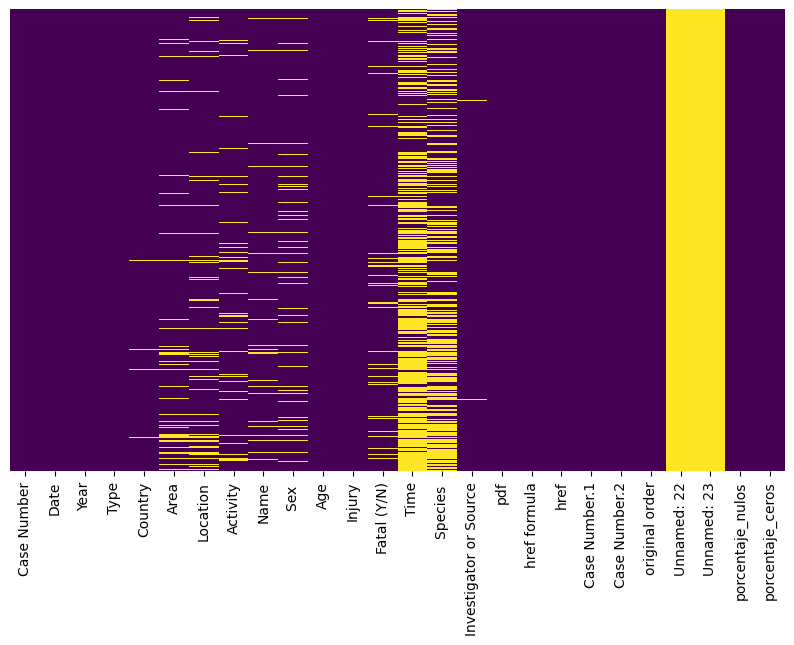

In [63]:
check_nan(data)

**EXPLORACIÓN COLUMNA YEAR**

In [65]:
# Tenemos muy bajo porcentaje de nulos pero probablemente tengamos la información para completarlos

bad_index_year = data.Year[data.Year.isna()].index
bad_index_year

Int64Index([187, 6079], dtype='int64')

In [66]:
data.loc[bad_index_year]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,porcentaje_nulos,porcentaje_ceros
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0,NaN,NaN,0.25,0.0
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,Unknown,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0,NaN,NaN,0.25,0.0


In [75]:
# Nos damos cuenta de que la columna 'Date' contiene la información que requerimos en 'Year'
# Filtramos con loc la columna Year con los índices que anteriormente nos guardamos, y sustituímos dichos índices
# por los valores resultantes de la lambda aplicada en Date para los mismos índices

data.loc[bad_index_year, 'Year'] = data.loc[bad_index_year, 'Date'].apply(lambda x: x[-4:])

In [76]:
data.loc[bad_index_year]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,porcentaje_nulos,porcentaje_ceros,year
187,2017.01.08.R,Reported 08-Jan-2017,2017,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0,NaN,NaN,0.25,0.0,2017
6079,1836.08.19.R,Reported 19-Aug-1836,1836,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,Unknown,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0,NaN,NaN,0.25,0.0,1836


'N nan cols: 14'

Type                       0.063472
Country                    0.793399
Area                       7.219930
Location                   8.568708
Activity                   8.632180
Name                       3.332275
Sex                        8.965408
Fatal (Y/N)                8.441765
Time                      53.221200
Species                   45.033323
Investigator or Source     0.269756
href formula               0.015868
Unnamed: 22               99.984132
Unnamed: 23               99.968264
dtype: float64

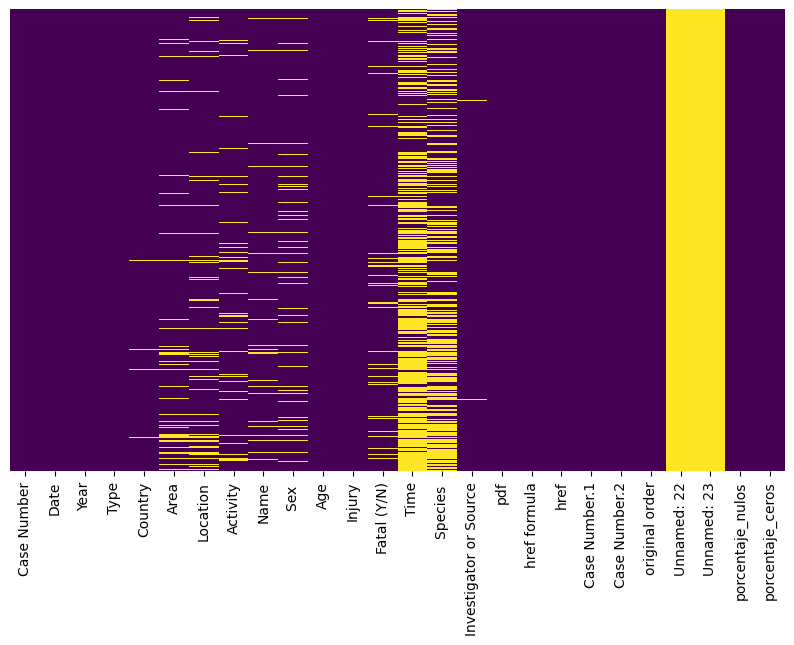

In [84]:
check_nan(data)

**EXPLORACIÓN DE LA COLUMNA TYPE**

In [85]:
data.Type.head()

0       Boating
1    Unprovoked
2       Invalid
3    Unprovoked
4      Provoked
Name: Type, dtype: object

In [95]:
data.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,porcentaje_nulos,porcentaje_ceros
2313,2313,26-Feb-1996,1996.0,Unprovoked,AUSTRALIA,New South Wales,"Charles Street Wharf, Parramatta River",Dived naked into the water on a bet,Darren Good,M,24,Left leg & right testicle bitten,N,Night,Bronze whaler shark,"Daily Telegraph, 2/29/1996, p.5; H. Edwards, p...",1996.02.26-Good.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1996.02.26,1996.02.26,3990.0,NaN,NaN,0.083333,0.0
2390,2390,16-Apr-1995,1995.0,Invalid,USA,Florida,"New Smyrna Beach, Volusia County",NaN,C.M.,M,12,"Dorsum of right hand bitten, a probable bluefi...",NaN,10h35,Invalid,"S. Petersohn, GSAF",1995.04.16-CM.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1995.04.16,1995.04.16,3913.0,NaN,NaN,0.166667,0.0
1148,1148,17-Mar-2009,2009.0,Unprovoked,USA,Hawaii,Alenuihaha Channel,Swimming,Mike Spaulding,M,61,"Minor injury, bite chest and left calf",N,20h00,Thought to involve a cookie cutter shark,"B. Perry, Maui News, 3/18/2009",2009.03.17.a-Spaulding.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.03.17,2009.03.17,5155.0,NaN,NaN,0.083333,0.0
2939,2939,June 1983,1983.0,Unprovoked,BAHAMAS,Berry Islands,Whale Cay,Spearfishing,Carl Starling,M,Unknown,Lacerations to thigh & buttocks,N,17h00,Caribbean reef shark,"E. Pace, FSAF & M. Levine, GSAF",1983.06.00-Starling,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.06.00,1983.06.00,3364.0,NaN,NaN,0.125000,0.0
6104,6104,Reported 15-Aug-1826,1826.0,Unprovoked,ENGLAND,Cumberland,Whitehaven,Bathing,child,NaN,Unknown,FATAL,NaN,NaN,NaN,"The Times (London), 8/15/1826",1826.08.15.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1826.08.15.R,1826.08.15.R,199.0,NaN,NaN,0.291667,0.0


In [89]:
# Mismo proceso que los anteriores

bad_index_type = data.Type[data.Type.isna()].index
bad_index_type

Int64Index([85, 382, 4867, 5705], dtype='int64')

In [90]:
data.loc[bad_index_type]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,porcentaje_nulos,porcentaje_ceros
85,85,15-Sep-2017,2017.0,NaN,SAMOA,Upolu Island,Nofoalii,Fishing,male,M,Unknown,Injuries to hands and legs,N,Night,NaN,"Samoa Observer, 9/16/2017",2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.a,2017.09.15.a,6218.0,NaN,NaN,0.208333,0.0
382,382,27-Jul-2015,2015.0,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,40,Injury to hand,NaN,NaN,NaN,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,5921.0,NaN,NaN,0.291667,0.0
4867,4867,Reported 11-Sep-1936,1936.0,NaN,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,M,Unknown,FATAL,Y,NaN,NaN,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.09.11.R,1936.09.11.R,1436.0,NaN,NaN,0.291667,0.0
5705,5705,Reported 03-Mar-1890,1890.0,NaN,CEYLON,NaN,NaN,Diving,a pearl diver,M,Unknown,FATAL,Y,NaN,NaN,"The Guardian, 3/3/1890",1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1890.03.03.R,1890.03.03.R,598.0,NaN,NaN,0.333333,0.0


In [96]:
# No podemos determinar esta información así que la catalogamos como unknown

data.fillna({'Type':'Unknown'}, inplace = True)

'N nan cols: 13'

Country                    0.793399
Area                       7.219930
Location                   8.568708
Activity                   8.632180
Name                       3.332275
Sex                        8.965408
Fatal (Y/N)                8.441765
Time                      53.221200
Species                   45.033323
Investigator or Source     0.269756
href formula               0.015868
Unnamed: 22               99.984132
Unnamed: 23               99.968264
dtype: float64

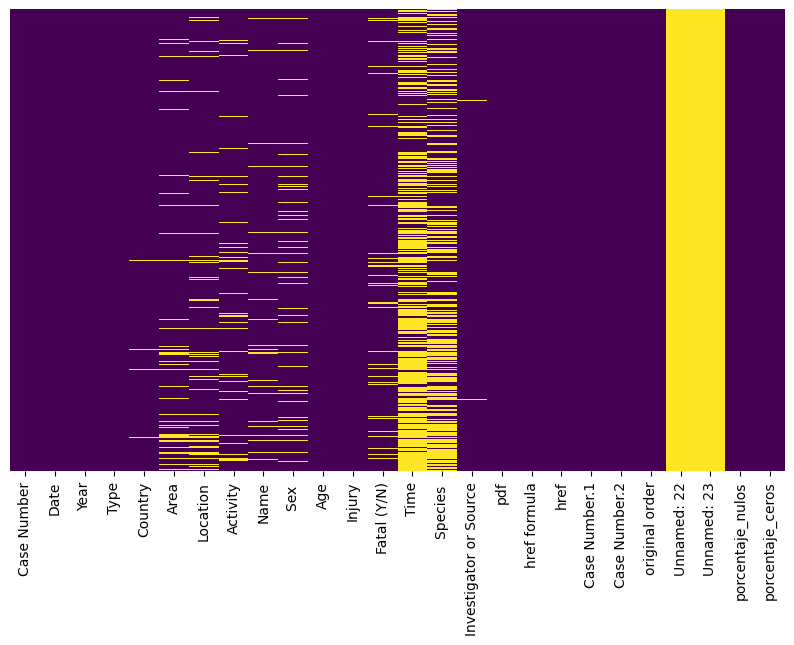

In [97]:
check_nan(data
        )

**EXPLORACIÓN COLUMNA 'COUNTRY'**

In [98]:
bad_index_country = data.Country[data.Country.isna()].index
bad_index_country

Int64Index([  62,  525, 2956, 3378, 3387, 3388, 3395, 3399, 3425, 3605, 3661,
            4018, 4231, 4266, 4498, 4639, 4700, 4712, 4726, 4729, 4911, 5020,
            5060, 5425, 5586, 5587, 5612, 5636, 5742, 5770, 5808, 5810, 5839,
            5885, 5920, 5996, 6001, 6092, 6119, 6131, 6133, 6137, 6155, 6165,
            6171, 6175, 6177, 6199, 6206, 6259],
           dtype='int64')

In [105]:
data.loc[bad_index_country, ['Country', 'Area', 'Location']].head()

,Country,Area,Location
62,NaN,NaN,NaN
525,NaN,NaN,NaN
2956,NaN,English Channel,NaN
3378,NaN,NaN,NaN
3387,NaN,Caribbean Sea,Between St. Kitts & Nevis


In [106]:
# Por un lado podemos comprobar que la localización y el area son valores difíciles de determinar
# La opción más logica es rellenarlos con 'Unknown'

data.fillna({'Area':'Unknown', 'Location':'Unknown'}, inplace=True)

In [107]:
data.loc[bad_index_country, ['Country', 'Area', 'Location']].head()

,Country,Area,Location
62,NaN,Unknown,Unknown
525,NaN,Unknown,Unknown
2956,NaN,English Channel,Unknown
3378,NaN,Unknown,Unknown
3387,NaN,Caribbean Sea,Between St. Kitts & Nevis


In [108]:
# Si tanto la localización como el area son desconocidas, no podemos determinar el pais hasta este punto
# Con el siguiente código introducimos el valor 'Unknown' siguiendo las condiciones anteriores.

data.loc[(data['Area'] == 'Unknown')&(data['Location'] == 'Unknown') , 'Country'] = 'Unknown'

In [109]:
data.loc[bad_index_country, ['Country', 'Area', 'Location']].head()

,Country,Area,Location
62,Unknown,Unknown,Unknown
525,Unknown,Unknown,Unknown
2956,NaN,English Channel,Unknown
3378,Unknown,Unknown,Unknown
3387,NaN,Caribbean Sea,Between St. Kitts & Nevis


In [116]:
# Reseteamos el bad_index_country para trabajar con los nulos restantes
bad_index_country = data.Country[data.Country.isna()].index

data.loc[bad_index_country].head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,porcentaje_nulos,porcentaje_ceros
2956,2956,Ca. 1983,India,Unprovoked,NaN,English Channel,Unknown,Swimming,Padma Shri Taranath Narayan Shenoy,M,Unknown,Left leg bitten,N,NaN,NaN,"Times of India, 2/5/2012",1983.00.00.d-Shenoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.00.00.d,1983.00.00.d,3347.0,NaN,NaN,0.291667,0.0
3387,3387,02-Aug-1970,San Cristobal y Nieves,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,Unknown,"Sharks scavenged on bodies, but no record of t...",NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,2916.0,NaN,NaN,0.291667,0.0
3605,3605,21-Oct-1965,1965.0,Unprovoked,NaN,Unknown,Florida Strait,The boat Caribou II sank,Mario Castellanos,M,39,Survived,N,NaN,NaN,"Lodi News Sentinel, 10/30/1965",1965.10.21-Castellanos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1965.10.21,1965.10.21,2698.0,NaN,NaN,0.250000,0.0
4018,4018,26-Jan-1960,1960.0,Sea Disaster,NaN,"Between Timor & Darwin, Australia",Unknown,Portuguese Airliner with 9 people aboard went ...,NaN,NaN,Unknown,"As searchers approached wreckage, sharks circl...",N,NaN,NaN,"V.M. Coppleson (1962), p.260",1960.01.26-Portuguese airliner.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1960.01.26,1960.01.26,2285.0,NaN,NaN,0.375000,0.0
4231,4231,13-Sep-1956,1956.0,Unprovoked,NaN,Near the Andaman & Nicobar Islands,Unknown,Climbing back on ship,male,M,Unknown,FATAL,Y,P.M.,Blue shark,M. Hosina,1956.09.13-TunaBoat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1956.09.13,1956.09.13,2072.0,NaN,NaN,0.208333,0.0


In [119]:
# Modificamos 5  manualmente
# Para el resto determino eliminarlas ya que no suponen una muestra a tener en cuenta y quiero hacer un análisis
# descriptivo en el que una de las variables será el pais.

data.loc[[2956], 'Year'] = 'UK'
data.loc[[3387], 'Year'] = 'San Cristobal y Nieves'
data.loc[[2956], 'Year'] = 'USA'
data.loc[[2956], 'Year'] = 'Australia'
data.loc[[2956], 'Year'] = 'India'

data.drop(bad_index_country, axis=0, inplace=True)

'N nan cols: 10'

Activity                   8.661041
Name                       3.279733
Sex                        8.963541
Fatal (Y/N)                8.438147
Time                      53.112562
Species                   44.913230
Investigator or Source     0.270658
href formula               0.015921
Unnamed: 22               99.984079
Unnamed: 23               99.968158
dtype: float64

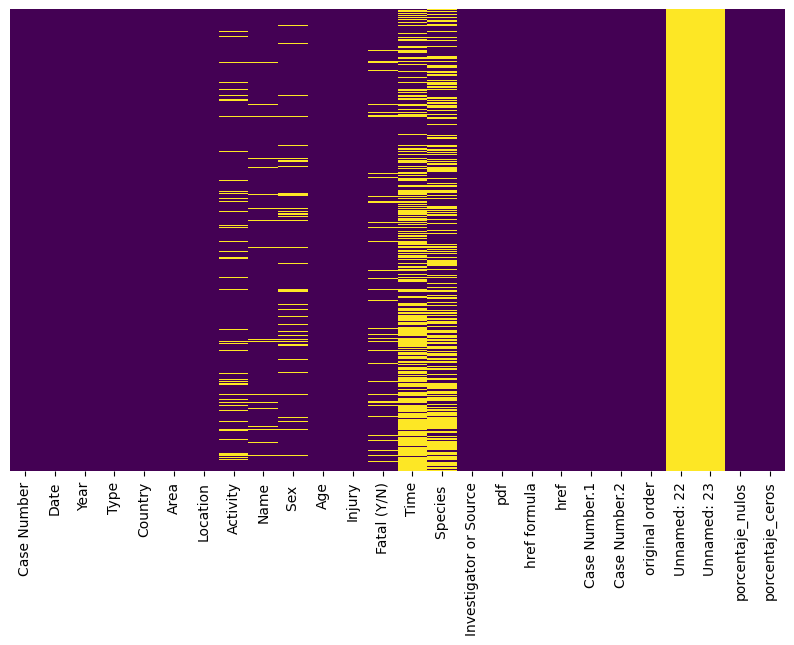

In [120]:
check_nan(data)

In [121]:
data.shape

(6281, 26)

**EXPLORACIÓN DE LA COLUMNA 'ACTIVITY'**

In [125]:
# Llegados a este punto me doy cuenta de que quiero hacer el estudio en torno a la actividad que se practicaba, 
# la época del año y quizá el pais en el que se produce.
# Es por esto que identificaré los valores nulos de la columna 'Activity' y eliminaré las columnas.



bad_index_activity = data.Activity[data.Activity.isna()].index

len(bad_index_activity)

544

In [ ]:
# Eliminar 544 filas es asumible.

In [126]:
data.drop(bad_index_activity, axis=0, inplace=True)

'N nan cols: 9'

Name                       2.562315
Sex                        7.181454
Fatal (Y/N)                7.094300
Time                      49.816978
Species                   43.681367
Investigator or Source     0.226599
href formula               0.017431
Unnamed: 22               99.982569
Unnamed: 23               99.965139
dtype: float64

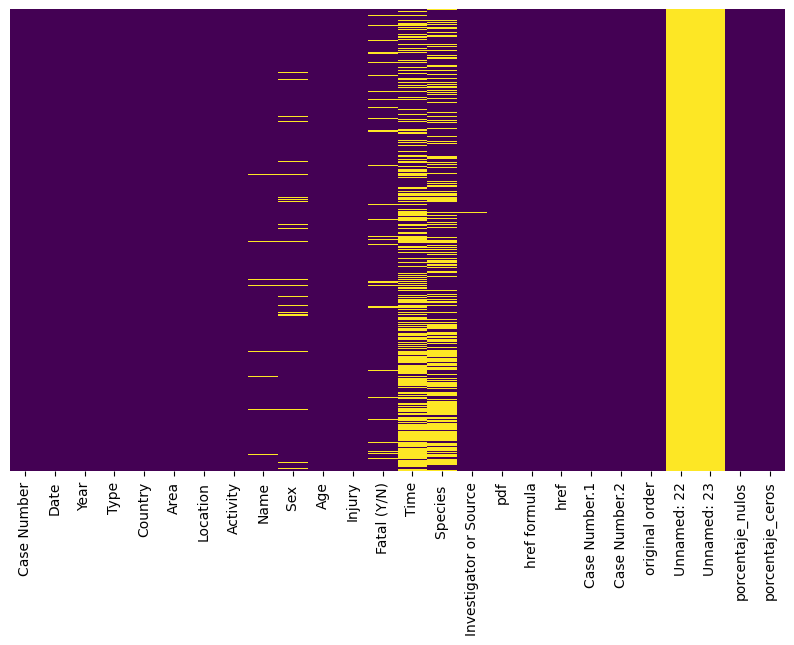

In [127]:
check_nan(data)

**EXPLORACIÓN DE LA COLUMNA 'NAME'**

In [128]:
bad_index_name = data.Name[data.Name.isna()].index
bad_index_name

Int64Index([  32,   86,  124,  184,  226,  560,  701,  771,  849,  866,
            ...
            6021, 6028, 6044, 6048, 6132, 6185, 6197, 6218, 6237, 6278],
           dtype='int64', length=147)

In [129]:
data.loc[bad_index_name]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,porcentaje_nulos,porcentaje_ceros
32,32,09-Apr-2018,2018.0,Unprovoked,NEW CALEDONIA,Unknown,"Magenta Beach, Noumea",Windsurfing,NaN,NaN,Unknown,"No injury, shark bit board",N,17h00,2 m shark,"Les Nouvelles Caledoniennes, 4/10/2018",2018.04.09-Magenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.09,2018.04.09,6271.0,NaN,NaN,0.250000,0.00
86,86,Sep-2017,2017.0,Boating,AUSTRALIA,Westerm Australia,Esperance,Fishing,NaN,NaN,Unknown,"sharks rammed boats, no injury to occupants",N,NaN,"White shark, 3.5m","B. Myatt, GSAF",2017.09.14-EsperanceBoats.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.14,2017.09.14,6217.0,NaN,NaN,0.250000,0.00
124,124,02-Jul-2017,2017.0,Invalid,COMOROS,Anjouan,Moya,Fishing,NaN,NaN,Unknown,"Skull found in shark, a probable drowning & sc...",NaN,NaN,Shark involvement prior to death not confirmed,"Linfo, 7/3/2017",2017.07.02-Comoros.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.02,2017.07.02,6179.0,NaN,NaN,0.291667,0.00
184,184,13-Jan-2017,2017.0,Unprovoked,AUSTRALIA,Queensland,Clairview,Swimming,NaN,M,57,Injury to hand,N,13h30,NaN,"Brisbane Times,1/13/2017",2017.01.13.b-Clairview.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.13.b,2017.01.13.b,6119.0,NaN,NaN,0.166667,0.00
226,226,Sep-2016,2016.0,Invalid,MEXICO,Unknown,Guadalupe Island,Cage Diving,NaN,NaN,Unknown,"No injury to divers, white shark breached cage",NaN,NaN,Invalid,K. Yonker,2016.09.00-Breach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.00,2016.09.00,6077.0,NaN,NaN,0.333333,0.00
560,560,04-May-2014,2014.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Simonstown,Diving,NaN,NaN,Unknown,4-inch laceration to arm,N,NaN,Cow shark,"Sunday Times, 5/5/2014",2015.05.04-CowShark.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.05.04,2014.05.04,5743.0,NaN,NaN,0.250000,0.00
701,701,21-Feb-2013,2013.0,Unprovoked,USA,Hawaii,"Ka'anapali, Honokowai, Maui",Surfing,NaN,NaN,Unknown,Lacerations to right leg,N,18h00,reef shark?,Hawaiisharks.com,2013.02.21.b-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.02.21.b,2013.02.21.b,5602.0,NaN,NaN,0.208333,0.00
771,771,Reported 28-Jun-2012,2012.0,Invalid,CROATIA,Unknown,Buccari Bay,Swimming,NaN,NaN,60,Leg struck. Initally reported as a shark attac...,NaN,NaN,No shark involvement,"Il Gazzettino, 6/28/2012",2012.06.28.R-Croatia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.28.R,2012.06.28.R,5532.0,NaN,NaN,0.291667,0.00
849,849,29-Oct-2011,2011.0,Provoked,SOUTH AFRICA,KwaZulu-Natal,"uShaka Aquarium, Durban",Diving,NaN,NaN,Unknown,Arm bitten by captive shark PROVOKED INCIDENT,N,NaN,Raggedtooth shark,"Durban Radio, 10/29/2011",2011.10.28-uShaka-Aquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.10.28.,2011.10.28.,5454.0,NaN,NaN,0.250000,0.00
866,866,17-Sep-2011,2011.0,Unprovoked,KENYA,Coast Province,"Mama Ngina Beach, Mombasa",Swimming,NaN,M,17,FATAL,Y,NaN,NaN,"Mombasa411, 9/20/2011",2011.09.17-Kenya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.09.17,2011.09.17,5437.0,NaN,NaN,0.208333,0.00


In [ ]:
# No me interesa conocer los nombres de las victimas, así que relleno con 'Unknowns'

In [130]:
data.fillna({'Name':'Unknown'}, inplace=True)

'N nan cols: 8'

Sex                        7.181454
Fatal (Y/N)                7.094300
Time                      49.816978
Species                   43.681367
Investigator or Source     0.226599
href formula               0.017431
Unnamed: 22               99.982569
Unnamed: 23               99.965139
dtype: float64

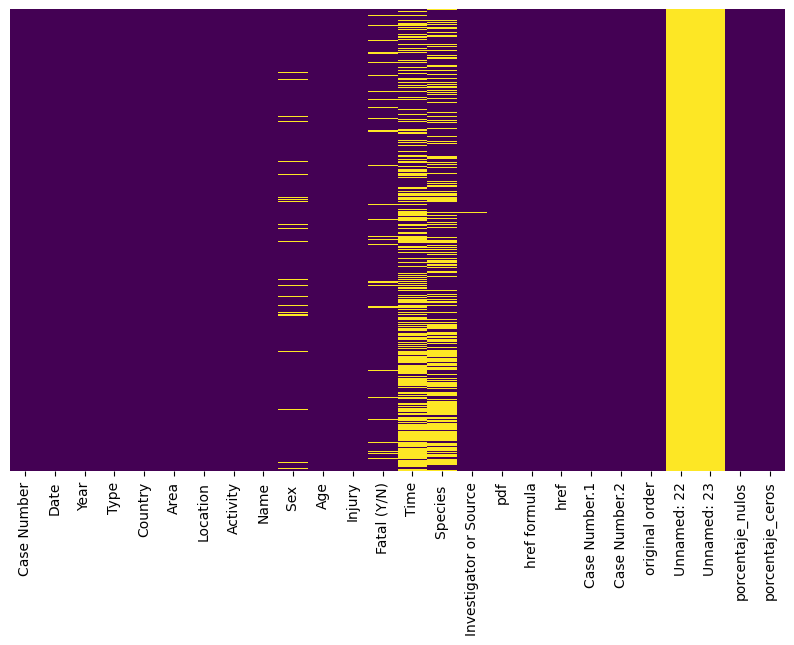

In [131]:
check_nan(data)

**EXPLORACIÓN DE LA COLUMNA 'SEX'**

**LIMPIEZA VALORES ERRONEOS DE 'CASE NUMBER'**

In [81]:
# La columna Case Number es una columna heterogenea que además se repite en algunas columnas más.
# Optamos por renombrarla con una lista de números que vaya desde 0 hasta la longitud de data.

data['Case Number'] = [e for e in range(len(data))]

In [82]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,porcentaje_nulos,porcentaje_ceros,year
0,0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,0.083333,0.0,NaN
1,1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,0.125000,0.0,NaN
2,2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,0.125000,0.0,NaN
3,3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Unknown,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,0.166667,0.0,NaN
4,4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,0.166667,0.0,NaN


In [ ]:
# Creamos una funcion que limpie en primer lugar que limpie de valores erroneos la columna Case Number.
'''
def limpieza_casenumber(x):
    try: 
        return x.split('.')
    
    except:
        return [np.nan, np.nan, np.nan]
        '''

In [ ]:
'''lst = []

for e in data['Case Number']:
    lst.append(limpieza_casenumber(e))
    
lst[:2]'''

In [ ]:
'''
for e in lst:
    if len(e) >= 4:
        e.pop()
    else:
        pass
lst[:18]
'''

In [ ]:
#data['Case Number'].head()